In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MSE
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
from matplotlib import rc, font_manager
import warnings
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('기상.csv', encoding='euc-kr')
df1 = pd.read_csv('기상1.csv', encoding='euc-kr')
df2 = pd.read_csv('기상2.csv', encoding='euc-kr')
df3 = pd.read_csv('기상3.csv', encoding='euc-kr')
df4 = pd.read_csv('기상4.csv', encoding='euc-kr')
df5 = pd.read_csv('기상5.csv', encoding='euc-kr')
df6 = pd.read_csv('기상6.csv', encoding='euc-kr')
df7 = pd.read_csv('기상7.csv', encoding='euc-kr')
df8 = pd.read_csv('기상8.csv', encoding='euc-kr')
df9 = pd.read_csv('기상9.csv', encoding='euc-kr')
df10 = pd.read_csv('기상10.csv', encoding='euc-kr')

FileNotFoundError: [Errno 2] No such file or directory: '기상.csv'

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),월,일,지점명_label
0,속초,2020-10-21,10.2,0.0,0.6,250.0,78.0,9.7,1020.7,1022.8,9.1,10,21,46
1,속초,2020-10-21,9.5,0.0,0.4,0.0,80.0,9.5,1020.4,1022.5,9.1,10,21,46
2,속초,2020-10-21,9.3,0.0,0.3,0.0,78.0,9.1,1020.1,1022.2,9.4,10,21,46
3,속초,2020-10-21,9.6,0.0,0.4,0.0,79.0,9.4,1019.7,1021.8,9.5,10,21,46
4,속초,2020-10-21,10.1,0.0,0.1,0.0,77.0,9.5,1019.5,1021.6,9.4,10,21,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274945,남해,2023-10-20,13.4,0.0,4.9,320.0,44.0,6.7,1012.6,1018.1,11.5,10,20,17
8274946,남해,2023-10-20,12.7,0.0,5.6,290.0,46.0,6.7,1013.3,1018.8,10.9,10,20,17
8274947,남해,2023-10-20,12.2,0.0,4.8,320.0,47.0,6.7,1013.9,1019.4,10.4,10,20,17
8274948,남해,2023-10-20,11.9,0.0,4.3,320.0,47.0,6.5,1014.5,1020.0,9.8,10,20,17


In [ ]:
data = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10],axis=0)
data.drop_duplicates(inplace=True)
data['일시'] = data['일시'].apply(lambda x : x[:-6])
data.fillna(0, inplace=True)
data

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C)
0,90,속초,2020-10-21,10.2,0.0,0.6,250.0,78.0,9.7,1020.7,1022.8,9.1
1,90,속초,2020-10-21,9.5,0.0,0.4,0.0,80.0,9.5,1020.4,1022.5,9.1
2,90,속초,2020-10-21,9.3,0.0,0.3,0.0,78.0,9.1,1020.1,1022.2,9.4
3,90,속초,2020-10-21,9.6,0.0,0.4,0.0,79.0,9.4,1019.7,1021.8,9.5
4,90,속초,2020-10-21,10.1,0.0,0.1,0.0,77.0,9.5,1019.5,1021.6,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
837569,295,남해,2023-10-20,13.4,0.0,4.9,320.0,44.0,6.7,1012.6,1018.1,11.5
837570,295,남해,2023-10-20,12.7,0.0,5.6,290.0,46.0,6.7,1013.3,1018.8,10.9
837571,295,남해,2023-10-20,12.2,0.0,4.8,320.0,47.0,6.7,1013.9,1019.4,10.4
837572,295,남해,2023-10-20,11.9,0.0,4.3,320.0,47.0,6.5,1014.5,1020.0,9.8


In [ ]:
data['월'] = data['일시'].apply(lambda x : x[5:7])
data['월'] = data['월'].astype('int')
data['일'] = data['일시'].apply(lambda x : x[8:])
data['일'] = data['일'].astype('int')

In [ ]:
data.head()

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),월,일
0,90,속초,2020-10-21,10.2,0.0,0.6,250.0,78.0,9.7,1020.7,1022.8,9.1,10,21
1,90,속초,2020-10-21,9.5,0.0,0.4,0.0,80.0,9.5,1020.4,1022.5,9.1,10,21
2,90,속초,2020-10-21,9.3,0.0,0.3,0.0,78.0,9.1,1020.1,1022.2,9.4,10,21
3,90,속초,2020-10-21,9.6,0.0,0.4,0.0,79.0,9.4,1019.7,1021.8,9.5,10,21
4,90,속초,2020-10-21,10.1,0.0,0.1,0.0,77.0,9.5,1019.5,1021.6,9.4,10,21


In [ ]:
le = LabelEncoder()
le.fit(data['지점명'])
data['지점명_label'] = le.transform(data['지점명'])

In [ ]:
data.drop(columns=['지점'], inplace=True)

In [4]:
data = pd.read_csv('가상데이터.csv')

In [5]:
traing_df = data.groupby(['지점명', '일시']).mean().reset_index()
traing_df

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),월,일,지점명_label
0,강릉,2013-10-21,13.921739,0.065217,1.804348,246.521739,76.739130,12.034783,1018.673913,1021.786957,15.234783,10.0,21.0,0.0
1,강릉,2013-10-22,13.650000,0.000000,1.708333,205.000000,75.916667,11.620833,1022.541667,1025.695833,14.545833,10.0,22.0,0.0
2,강릉,2013-10-23,14.391667,0.012500,1.729167,232.083333,74.458333,12.054167,1020.391667,1023.529167,15.604167,10.0,23.0,0.0
3,강릉,2013-10-24,15.058333,0.000000,2.183333,264.583333,67.833333,11.466667,1013.354167,1016.470833,16.516667,10.0,24.0,0.0
4,강릉,2013-10-25,11.950000,0.000000,2.641667,242.916667,49.583333,6.795833,1012.308333,1015.454167,13.904167,10.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345810,흑산도,2023-10-17,16.737500,0.000000,5.670833,317.083333,71.583333,13.550000,1010.891667,1019.766667,17.145833,10.0,17.0,97.0
345811,흑산도,2023-10-18,17.575000,0.000000,2.683333,174.583333,77.458333,15.537500,1011.225000,1020.095833,17.104167,10.0,18.0,97.0
345812,흑산도,2023-10-19,19.037500,0.062500,3.320833,162.916667,85.500000,18.762500,1008.020833,1016.800000,19.479167,10.0,19.0,97.0
345813,흑산도,2023-10-20,14.504167,0.116667,10.700000,268.333333,67.708333,11.029167,1009.462500,1018.420833,15.691667,10.0,20.0,97.0


In [18]:
result_df = data.groupby(['지점명','월','일']).mean().reset_index()
result_df

TypeError: Could not convert 2021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012021-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012020-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012019-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012018-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012017-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012016-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012015-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012014-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012022-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-012023-01-01 to numeric

In [ ]:
x = traing_df[['강수량(mm)','풍속(m/s)',"풍향(16방위)",'습도(%)',
               '증기압(hPa)','현지기압(hPa)','해면기압(hPa)'
               ,'지면온도(°C)','지점명_label','월','일']]
y = traing_df['기온(°C)']

In [ ]:
x_max = x.max()
x_min = x.min()

In [ ]:
y_max = y.max()
y_min = y.min()

In [ ]:
x = (x - x_min) / (x_max - x_min)
x_scaled= x.values
x

,강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),지점명_label,월,일
0,0.004001,0.081552,0.684783,0.767391,0.306391,0.982991,0.983630,0.520461,0.0,0.818182,0.666667
1,0.000000,0.077213,0.569444,0.759167,0.295852,0.986724,0.987393,0.508457,0.0,0.818182,0.700000
2,0.000767,0.078154,0.644676,0.744583,0.306884,0.984649,0.985307,0.526897,0.0,0.818182,0.733333
3,0.000000,0.098682,0.734954,0.678333,0.291927,0.977858,0.978513,0.542795,0.0,0.818182,0.766667
4,0.000000,0.119397,0.674769,0.495833,0.173014,0.976849,0.977534,0.497278,0.0,0.818182,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
345810,0.000000,0.256309,0.880787,0.715833,0.344967,0.975482,0.981685,0.553757,1.0,0.818182,0.533333
345811,0.000000,0.121281,0.484954,0.774583,0.395566,0.975803,0.982002,0.553031,1.0,0.818182,0.566667
345812,0.003834,0.150094,0.452546,0.855000,0.477671,0.972711,0.978830,0.594410,1.0,0.818182,0.600000
345813,0.007157,0.483616,0.745370,0.677083,0.280789,0.974103,0.980390,0.528421,1.0,0.818182,0.633333


In [ ]:
y = (y - y_min) / (y_max - y_min)
y

0         0.627256
1         0.622198
2         0.636004
3         0.648414
4         0.590553
            ...   
345810    0.679671
345811    0.695261
345812    0.722485
345813    0.638098
345814    0.639882
Name: 기온(°C), Length: 345815, dtype: float64

In [ ]:
output = np.array([y])
output = output.reshape(output.shape[1],  output.shape[0])

In [ ]:
x_scaled = x_scaled.reshape(x_scaled.shape[0],  x_scaled.shape[1],1)
output_scaled = output.reshape(output.shape[0],  output.shape[1])

In [ ]:
x_train1, x_test, y_train1, y_test = train_test_split(x_scaled, output_scaled, test_size=0.2, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.3, shuffle=True)

In [ ]:
model = Sequential() # Sequeatial Model

model.add(Dense(50, activation='tanh', input_shape= (11,1)))

model.add(Dense(50, activation='tanh'))

model.add(LSTM(50, activation='tanh', return_sequences=False))

model.add(Dropout(0.2))  # 20%의 드롭아웃

model.add(Dense(1 * 2, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam',  metrics=['accuracy']) #optimizer=SGD(learning_rate=0.0001, momentum=0.9, nesterov=True) )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11, 50)            100       
                                                                 
 dense_1 (Dense)             (None, 11, 50)            2550      
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 22,955
Trainable params: 22,955
Non-traina

In [ ]:
model.fit(x_train, y_train, epochs=30, batch_size=500, validation_data=(x_val, y_val))

Epoch 1/30
388/388 [==============================] - 64s 132ms/step - loss: 0.0626 - accuracy: 5.1638e-06 - val_loss: 0.0229 - val_accuracy: 0.0000e+00
Epoch 2/30
388/388 [==============================] - 121s 312ms/step - loss: 0.0213 - accuracy: 5.1638e-06 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 3/30
388/388 [==============================] - 111s 287ms/step - loss: 0.0162 - accuracy: 5.1638e-06 - val_loss: 0.0107 - val_accuracy: 0.0000e+00
Epoch 4/30
388/388 [==============================] - 130s 335ms/step - loss: 0.0136 - accuracy: 5.1638e-06 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 5/30
388/388 [==============================] - 147s 380ms/step - loss: 0.0122 - accuracy: 5.1638e-06 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 6/30
388/388 [==============================] - 25s 64ms/step - loss: 0.0116 - accuracy: 5.1638e-06 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 7/30
388/388 [==============================] - 21s 55ms/step - loss: 0.0

In [ ]:
loss = model.evaluate(x_test, y_test, batch_size=100)

model.reset_states()

result1 = model.predict(x_test)

# size = len(result1)


print("예측결과")

print(len(result1))

print(result1)

2162/2162 [==============================] - 11s 4ms/step
예측결과
69163
[[0.5576465 ]
 [0.40311903]
 [0.65468377]
 ...
 [0.47958082]
 [0.51512074]
 [0.680832  ]]


In [ ]:
origin_y = y_test * (y_max - y_min) + y_min

result1 = result1 * (y_max - y_min) + y_min


In [ ]:
mse = mean_squared_error(y_pred=result1, y_true=origin_y)
print(f'Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_pred=result1, y_true=origin_y)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.2931571265134491
Mean Absolute Error (MAE): 0.2926815246745176


In [ ]:
# 사용자 입력 전처리 함수
def preprocess_user_input(user_location, user_month, user_day):
 
    # '지역명'에 대해 이전에 사용한 LabelEncoder로 라벨 변환
    pre_data = result_df[(result_df['지점명'] == user_location) & (result_df['월'] == user_month) & (result_df['일'] == user_day)].reset_index(drop=True)
    pre_data.drop(columns=['지점명','기온(°C)'], inplace=True)
    pre_data_scaled = (pre_data - x_min) / (x_max - x_min)

    
    pre_data_scaled = pre_data_scaled.values
    pre_data_scaled = pre_data_scaled.reshape(pre_data_scaled.shape[0], pre_data_scaled.shape[1], 1)
                        
 

    # 결과 반환
    return pre_data_scaled


In [ ]:
# 모델 예측 함수
def predict_with_model(model, input_data):
    # 모델 예측 수행
    model.reset_states()
    result = model.predict(input_data)
    # 여기서 결과 후처리 작업을 수행할 수 있습니다.
    result = result * (y_max - y_min) + y_min
    # 예측 결과 반환
    return result

In [ ]:
result_df

,지점명,월,일,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),지점명_label
0,강릉,1,1,1.629167,0.000000,3.776667,265.333333,31.754167,2.285000,914.162500,917.155000,1.094167,0.0
1,강릉,1,2,2.889167,0.000000,3.465833,250.666667,33.612500,2.695000,952.052500,989.412083,1.973750,0.0
2,강릉,1,3,3.226250,0.000000,3.221667,253.375000,30.150000,2.483750,1020.027917,1023.360833,2.287917,0.0
3,강릉,1,4,3.415000,0.035417,2.657500,233.041667,40.091667,3.106667,1020.150833,1023.478333,2.480000,0.0
4,강릉,1,5,2.687917,0.027500,2.594167,253.791667,46.550000,3.365833,1021.202083,1024.542917,1.846667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35670,흑산도,12,27,3.450000,0.063333,9.027917,275.416667,70.558333,5.632917,1017.180833,1026.730000,4.320833,97.0
35671,흑산도,12,28,4.084583,0.021250,5.795417,254.375000,69.841667,5.808750,1018.168333,1027.702500,4.445000,97.0
35672,흑산도,12,29,5.271667,0.098333,6.327500,287.875000,70.616667,6.377500,1016.726667,1026.204583,5.094167,97.0
35673,흑산도,12,30,4.925417,0.007917,6.674583,289.916667,69.354167,6.091667,1017.038333,1026.535417,5.265833,97.0


In [ ]:
# 사용자로부터 입력 받기
user_location = input("지역명을 입력하세요: ")
user_month = int(input("월을 입력하세요: "))
user_day = int(input("일을 입력하세요: "))
# print(preprocess_user_input(user_location, user_month, user_day))

# 모델 예측 함수 호출
prediction_result = predict_with_model(model, preprocess_user_input(user_location, user_month, user_day))

# 결과 출력
print("모델 예측 결과:", prediction_result[0][0])

1/1 [==============================] - 8s 8s/step
모델 예측 결과: 12.523195


In [ ]:
x.max()

강수량(mm)      1.0
풍속(m/s)      1.0
풍향(16방위)     1.0
습도(%)        1.0
증기압(hPa)     1.0
현지기압(hPa)    1.0
해면기압(hPa)    1.0
지면온도(°C)     1.0
지점명_label    1.0
월            1.0
일            1.0
dtype: float64

In [ ]:
x_max

강수량(mm)        16.300000
풍속(m/s)        22.125000
풍향(16방위)      360.000000
습도(%)         100.000000
증기압(hPa)       39.279167
현지기압(hPa)    1036.300000
해면기압(hPa)    1038.791667
지면온도(°C)       42.758333
지점명_label      97.000000
월              12.000000
일              31.000000
dtype: float64

In [ ]:
data['지점명'].value_counts()

지점명
대구         87456
대전         87456
부산         87456
수원         87456
북강릉        87455
           ...  
북춘천        61677
진도(첨찰산)    50574
세종         38374
대구(기)      14353
서청주         4153
Name: count, Length: 98, dtype: int64

In [7]:
target = traing_df[(traing_df['일시'] >= '2023-01-01')].reset_index(drop=True)
traing = traing_df[(traing_df['일시'] < '2023-01-01')]

In [8]:
target

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),월,일,지점명_label
0,강릉,2023-01-01,4.862500,0.000000,2.900000,277.916667,33.500000,2.829167,1022.820833,1026.200000,1.437500,1.0,1.0,0.0
1,강릉,2023-01-02,1.800000,0.000000,2.654167,245.833333,25.125000,1.737500,1024.137500,1027.595833,0.529167,1.0,2.0,0.0
2,강릉,2023-01-03,1.425000,0.000000,3.579167,273.333333,25.291667,1.658333,1022.316667,1025.775000,0.145833,1.0,3.0,0.0
3,강릉,2023-01-04,2.304167,0.000000,3.020833,282.083333,22.041667,1.570833,1023.750000,1027.195833,0.333333,1.0,4.0,0.0
4,강릉,2023-01-05,3.562500,0.000000,2.533333,265.833333,31.333333,2.441667,1024.720833,1028.145833,0.866667,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28073,흑산도,2023-10-17,16.737500,0.000000,5.670833,317.083333,71.583333,13.550000,1010.891667,1019.766667,17.145833,10.0,17.0,97.0
28074,흑산도,2023-10-18,17.575000,0.000000,2.683333,174.583333,77.458333,15.537500,1011.225000,1020.095833,17.104167,10.0,18.0,97.0
28075,흑산도,2023-10-19,19.037500,0.062500,3.320833,162.916667,85.500000,18.762500,1008.020833,1016.800000,19.479167,10.0,19.0,97.0
28076,흑산도,2023-10-20,14.504167,0.116667,10.700000,268.333333,67.708333,11.029167,1009.462500,1018.420833,15.691667,10.0,20.0,97.0


In [9]:
traing

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),월,일,지점명_label
0,강릉,2013-10-21,13.921739,0.065217,1.804348,246.521739,76.739130,12.034783,1018.673913,1021.786957,15.234783,10.0,21.0,0.0
1,강릉,2013-10-22,13.650000,0.000000,1.708333,205.000000,75.916667,11.620833,1022.541667,1025.695833,14.545833,10.0,22.0,0.0
2,강릉,2013-10-23,14.391667,0.012500,1.729167,232.083333,74.458333,12.054167,1020.391667,1023.529167,15.604167,10.0,23.0,0.0
3,강릉,2013-10-24,15.058333,0.000000,2.183333,264.583333,67.833333,11.466667,1013.354167,1016.470833,16.516667,10.0,24.0,0.0
4,강릉,2013-10-25,11.950000,0.000000,2.641667,242.916667,49.583333,6.795833,1012.308333,1015.454167,13.904167,10.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345516,흑산도,2022-12-27,5.204167,0.000000,6.250000,332.083333,63.000000,5.570833,1019.191667,1028.575000,5.208333,12.0,27.0,97.0
345517,흑산도,2022-12-28,4.679167,0.000000,7.212500,338.333333,62.083333,5.287500,1020.670833,1030.079167,4.862500,12.0,28.0,97.0
345518,흑산도,2022-12-29,4.354167,0.000000,6.579167,348.333333,55.291667,4.608333,1022.841667,1032.287500,4.695833,12.0,29.0,97.0
345519,흑산도,2022-12-30,4.416667,0.000000,5.700000,340.833333,53.666667,4.487500,1022.795833,1032.241667,4.429167,12.0,30.0,97.0


In [10]:
x_traing = traing[['강수량(mm)','풍속(m/s)','풍향(16방위)','습도(%)','증기압(hPa)','현지기압(hPa)','해면기압(hPa)','지면온도(°C)','월','일','지점명_label']]
y_traing = traing['기온(°C)']

In [11]:
x_max =x_traing.max()
x_min =x_traing.min()
y_max =y_traing.max()
y_min =y_traing.min()

In [12]:
x_traing = (x_traing - x_min) / (x_max - x_min)
x_traing_scaled= x_traing.values


y_traing = (y_traing - y_min) / (y_max - y_min)
y_traing

0         0.627256
1         0.622198
2         0.636004
3         0.648414
4         0.590553
            ...   
345516    0.464981
345517    0.455208
345518    0.449158
345519    0.450322
345520    0.452959
Name: 기온(°C), Length: 317737, dtype: float64

In [13]:
target_y = np.array([y_traing])
target_y = target_y.reshape(target_y.shape[1],  target_y.shape[0])

In [14]:
x_traing_scaled = x_traing_scaled.reshape(x_traing_scaled.shape[0],  x_traing_scaled.shape[1],1)
y_traing_scaled = target_y.reshape(target_y.shape[0],  target_y.shape[1])

In [27]:
model = Sequential() # Sequeatial Model

model.add(Dense(50, activation='tanh', input_shape= (11,1)))

model.add(Dense(50, activation='tanh'))

model.add(LSTM(50, activation='tanh', return_sequences=False))

model.add(Dropout(0.2))  # 20%의 드롭아웃

model.add(Dense(1 * 2, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam',  metrics=['accuracy']) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11, 50)            100       
                                                                 
 dense_5 (Dense)             (None, 11, 50)            2550      
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 102       
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 22,955
Trainable params: 22,955
Non-trai

In [28]:
history = model.fit(x_traing_scaled, y_traing_scaled, epochs=30, batch_size=500,   validation_split=0.2, verbose=1)

Epoch 1/30


509/509 [==============================] - 35s 50ms/step - loss: 0.0549 - accuracy: 3.9341e-06 - val_loss: 0.0279 - val_accuracy: 1.5736e-05
Epoch 2/30
509/509 [==============================] - 23s 45ms/step - loss: 0.0230 - accuracy: 3.9341e-06 - val_loss: 0.0165 - val_accuracy: 1.5736e-05
Epoch 3/30
509/509 [==============================] - 23s 46ms/step - loss: 0.0173 - accuracy: 3.9341e-06 - val_loss: 0.0138 - val_accuracy: 1.5736e-05
Epoch 4/30
509/509 [==============================] - 22s 43ms/step - loss: 0.0140 - accuracy: 3.9341e-06 - val_loss: 0.0093 - val_accuracy: 1.5736e-05
Epoch 5/30
509/509 [==============================] - 22s 43ms/step - loss: 0.0121 - accuracy: 3.9341e-06 - val_loss: 0.0087 - val_accuracy: 1.5736e-05
Epoch 6/30
509/509 [==============================] - 22s 44ms/step - loss: 0.0111 - accuracy: 3.9341e-06 - val_loss: 0.0079 - val_accuracy: 1.5736e-05
Epoch 7/30
509/509 [==============================] - 30s 59ms/step - loss: 0.0103 - accuracy: 3.93

In [29]:
import matplotlib.pyplot as plt

def show_graph(history):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc)+1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

    fig.suptitle('Loss and Accuracy Change over Epochs', fontsize=18)

    ax1.plot(epochs, loss, 'r', label = 'Training Loss')
    ax1.plot(epochs, val_loss, 'b', label = 'Validation Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.set(xlabel='Epochs', ylabel='Loss')
    ax1.legend()

    ax2.plot(epochs, acc, 'orange', label = 'Training Accuracy')
    ax2.plot(epochs, val_acc, 'g', label = 'Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set(xlabel='Epochs', ylabel='Accuracy')
    ax2.legend()



    plt.show()

C:\Users\woong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


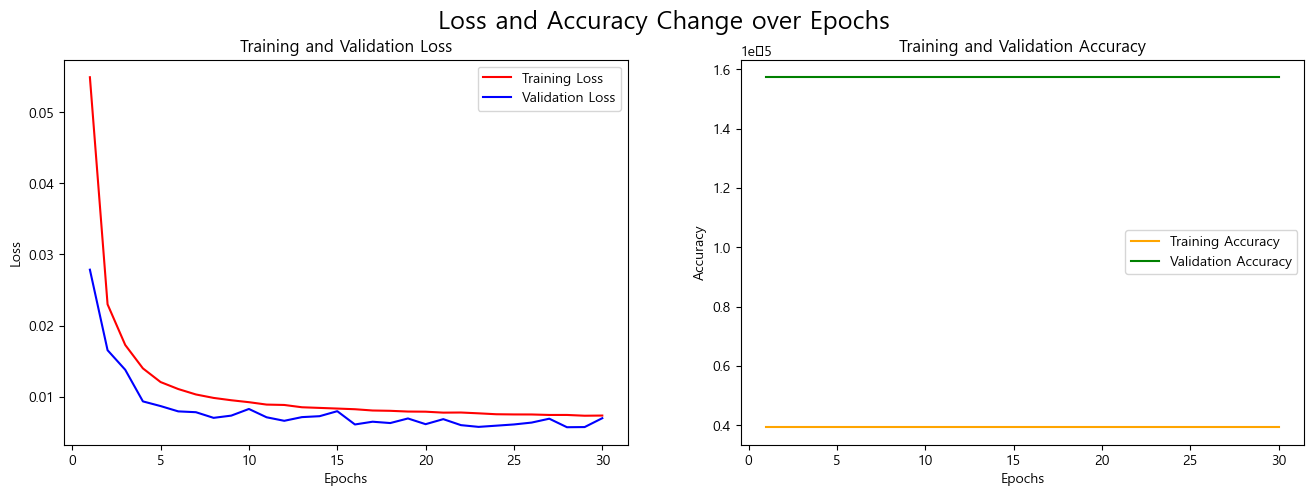

In [30]:
show_graph(history)

In [15]:
target_test_x = target[['강수량(mm)','풍속(m/s)','풍향(16방위)','습도(%)','증기압(hPa)','현지기압(hPa)','해면기압(hPa)','지면온도(°C)','월','일','지점명_label']]
target_test_y = target['기온(°C)']

In [16]:
target_test_x = (target_test_x - x_min) / (x_max - x_min)
x_test_scaled= target_test_x.values


target_test_y = (target_test_y - y_min) / (y_max - y_min)
target_test_y

0        0.458621
1        0.401613
2        0.394633
3        0.410998
4        0.434422
           ...   
28073    0.679671
28074    0.695261
28075    0.722485
28076    0.638098
28077    0.639882
Name: 기온(°C), Length: 28078, dtype: float64

In [17]:
test_y = np.array([target_test_y])
test_y = test_y.reshape(test_y.shape[1],  test_y.shape[0])

In [18]:
x_test_scaled = x_test_scaled.reshape(x_test_scaled.shape[0],  x_test_scaled.shape[1],1)
y_test_scaled = test_y.reshape(test_y.shape[0],  test_y.shape[1])

In [35]:
loss = model.evaluate(x_test_scaled, y_test_scaled, batch_size=100)

model.reset_states()

result2 = model.predict(x_test_scaled)

# size = len(result2)


print("예측결과")

print(len(result2))

print(result2)

 29/281 [==>...........................] - ETA: 2s - loss: 0.0067 - accuracy: 0.0000e+00

878/878 [==============================] - 9s 7ms/step
예측결과
28078
[[0.44653806]
 [0.39955094]
 [0.38447332]
 ...
 [0.7275018 ]
 [0.6374011 ]
 [0.6399476 ]]


In [19]:
origin_y = y_test_scaled * (y_max - y_min) + y_min

# result2 = result2 * (y_max - y_min) + y_min
origin_y

array([[ 4.8625    ],
       [ 1.8       ],
       [ 1.425     ],
       ...,
       [19.0375    ],
       [14.50416667],
       [14.6       ]])

In [20]:
target['기온(°C)']

0         4.862500
1         1.800000
2         1.425000
3         2.304167
4         3.562500
           ...    
28073    16.737500
28074    17.575000
28075    19.037500
28076    14.504167
28077    14.600000
Name: 기온(°C), Length: 28078, dtype: float64

In [59]:
mse = mean_squared_error(y_pred=result2, y_true=origin_y)
print(f'Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_pred=result2, y_true=origin_y)
print(f'Mean Absolute Error (MAE): {mae}')

print(f'Root Mean Squared Error (RMSE): {mse**0.5}')

Mean Squared Error (MSE): 0.250370009799538
Mean Absolute Error (MAE): 0.3691441719743819
Root Mean Squared Error (RMSE): 0.5003698729935067


In [38]:
target['일시']

0        2023-01-01
1        2023-01-02
2        2023-01-03
3        2023-01-04
4        2023-01-05
            ...    
28073    2023-10-17
28074    2023-10-18
28075    2023-10-19
28076    2023-10-20
28077    2023-10-21
Name: 일시, Length: 28078, dtype: object

In [52]:
target[target['지점명'] == '속초']

,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),현지기압(hPa),해면기압(hPa),지면온도(°C),월,일,지점명_label
13094,속초,2023-01-01,3.425000,0.0,3.083333,267.916667,24.208333,1.854167,1023.704167,1025.904167,0.491667,1.0,1.0,46.0
13095,속초,2023-01-02,-0.487500,0.0,1.512500,241.666667,21.833333,1.295833,1025.116667,1027.358333,-1.008333,1.0,2.0,46.0
13096,속초,2023-01-03,-0.241667,0.0,1.825000,196.250000,19.458333,1.129167,1023.200000,1025.445833,-1.620833,1.0,3.0,46.0
13097,속초,2023-01-04,0.754167,0.0,2.212500,292.083333,14.833333,0.950000,1024.762500,1026.975000,-1.179167,1.0,4.0,46.0
13098,속초,2023-01-05,2.429167,0.0,2.270833,285.000000,23.125000,1.662500,1025.675000,1027.879167,0.091667,1.0,5.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13383,속초,2023-10-17,14.716667,0.0,1.845833,228.333333,62.291667,10.325000,1015.520833,1017.616667,15.000000,10.0,17.0,46.0
13384,속초,2023-10-18,18.070833,0.0,2.000000,199.583333,47.375000,9.341667,1014.687500,1016.733333,15.283333,10.0,18.0,46.0
13385,속초,2023-10-19,19.350000,0.0,2.558333,246.250000,56.083333,12.508333,1011.450000,1013.466667,16.670833,10.0,19.0,46.0
13386,속초,2023-10-20,14.308333,0.0,2.779167,298.333333,37.625000,6.208333,1011.237500,1013.337500,15.445833,10.0,20.0,46.0


In [ ]:
target['지점명'][13094:13388]

In [51]:
target['지점명'][4982:5276]

4982    남해
4983    남해
4984    남해
4985    남해
4986    남해
        ..
5271    남해
5272    남해
5273    남해
5274    남해
5275    남해
Name: 지점명, Length: 294, dtype: object

In [49]:
target['지점명'][5570:5864]

5570    대구
5571    대구
5572    대구
5573    대구
5574    대구
        ..
5859    대구
5860    대구
5861    대구
5862    대구
5863    대구
Name: 지점명, Length: 294, dtype: object

In [47]:
target['지점명'][24554:24848]

24554    춘천
24555    춘천
24556    춘천
24557    춘천
24558    춘천
         ..
24843    춘천
24844    춘천
24845    춘천
24846    춘천
24847    춘천
Name: 지점명, Length: 294, dtype: object

In [40]:
result2

array([[ 4.213396 ],
       [ 1.689209 ],
       [ 0.8792267],
       ...,
       [19.307005 ],
       [14.466719 ],
       [14.603518 ]], dtype=float32)

In [55]:
target['일시'] = pd.to_datetime(target['일시'])

C:\Users\woong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


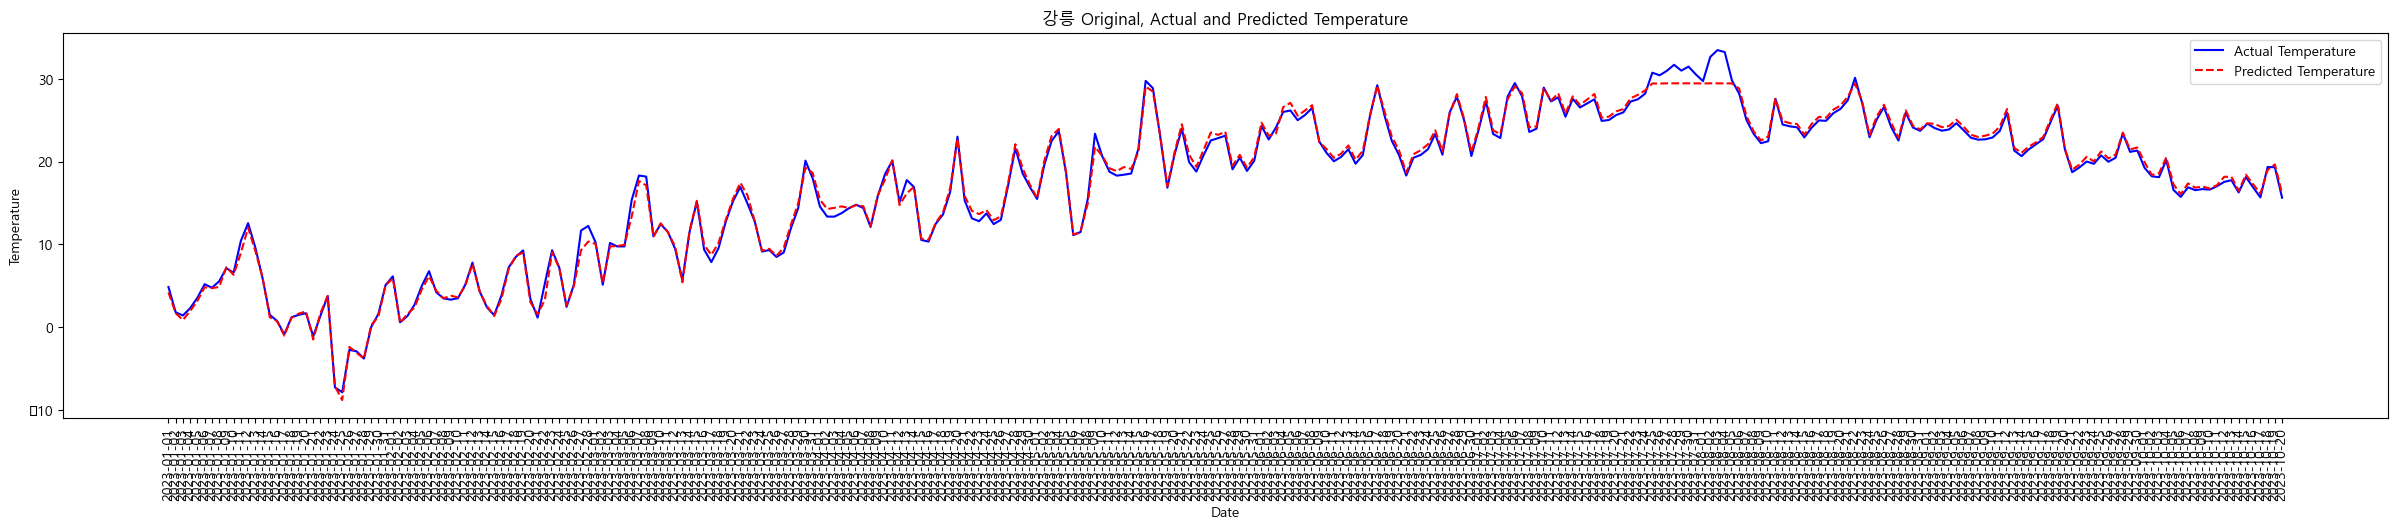

In [45]:
# plotting
plt.figure(figsize=(30, 5))

# plot original 'Open' prices
# plt.plot(traing['일시'], traing['기온(°C)'], color='green', label='Original Temperature')

# plot actual vs predicted
plt.plot(target['일시'][:293], origin_y[:293], color='blue', label='Actual Temperature')
plt.plot(target['일시'][:293], result2[:293], color='red', linestyle='--', label='Predicted Temperature')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Temperature')
plt.title('강릉 Original, Actual and Predicted Temperature')
plt.legend()
plt.show()

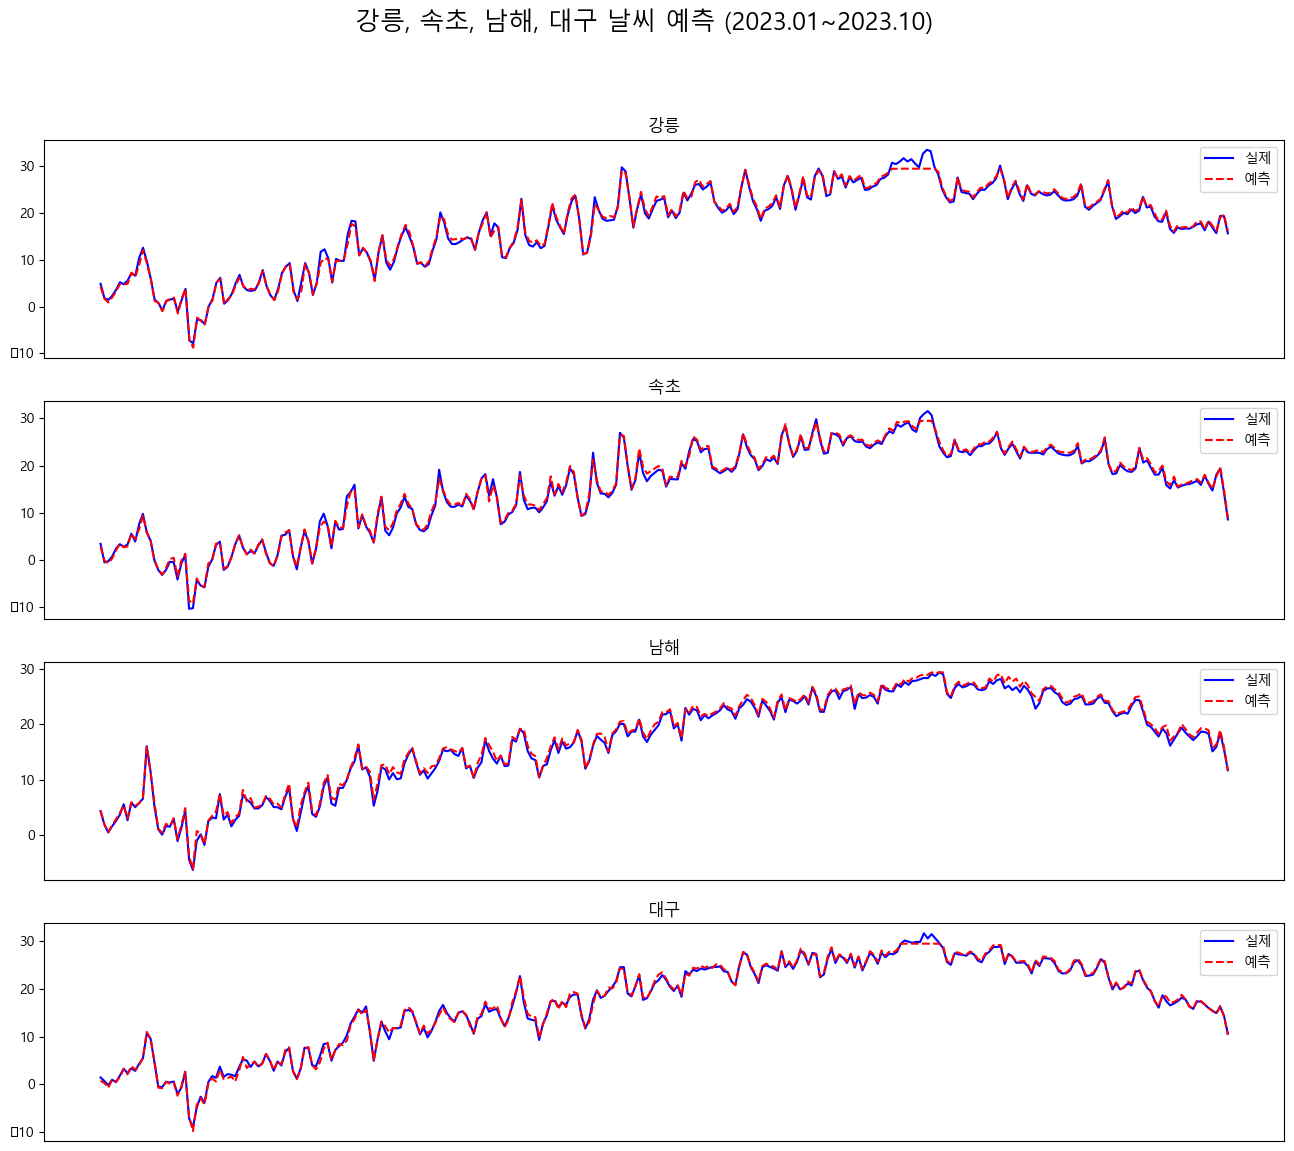

In [58]:
# 강릉, 속초, 원주, 춘천 예측 확인


figure, axes = plt.subplots(nrows=4 , figsize=(16, 13))
plt.suptitle('강릉, 속초, 남해, 대구 날씨 예측 (2023.01~2023.10)', fontsize=18)
axes[0].plot(target['일시'][:293], origin_y[:293], color='b', label = '실제')
axes[0].plot(target['일시'][:293], result2[:293], color='r', linestyle ='dashed', label = '예측')

axes[1].plot(target['일시'][13094:13388], origin_y[13094:13388], color='b', label = '실제')
axes[1].plot(target['일시'][13094:13388], result2[13094:13388], color='r', linestyle ='dashed', label = '예측')

axes[2].plot(target['일시'][4982:5276], origin_y[4982:5276], color='b', label = '실제')
axes[2].plot(target['일시'][4982:5276], result2[4982:5276], color='r', linestyle ='dashed', label = '예측')

axes[3].plot(target['일시'][5570:5864], origin_y[5570:5864], color='b', label = '실제')
axes[3].plot(target['일시'][5570:5864], result2[5570:5864], color='r', linestyle ='dashed', label = '예측')


axes[0].set_title('강릉')
axes[1].set_title('속초')
axes[2].set_title('남해')
axes[3].set_title('대구')

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', rotation=45)
axes[3].tick_params(axis='x', rotation=45)

for i in range(0, 4):
  axes[i].xaxis.set_tick_params(labelbottom=False)
  axes[i].set_xticks([])
  
plt.show()

In [ ]:
# 사용자로부터 입력 받기
user_location = '부산'
user_month = 10
user_day = 29


# 모델 예측 함수 호출
prediction_result = predict_with_model(model, preprocess_user_input(user_location, user_month, user_day))

# 결과 출력
print("모델 예측 결과:", prediction_result[0][0])

1/1 [==============================] - 0s 68ms/step
모델 예측 결과: 16.201239


In [ ]:
target_test_x = target[['강수량(mm)','풍속(m/s)','풍향(16방위)','습도(%)','증기압(hPa)','현지기압(hPa)','해면기압(hPa)','지면온도(°C)','월','일','지점명_label']]
target_test_y = target['기온(°C)']

In [ ]:
target_test_x = (target_test_x - x_min) / (x_max - x_min)
x_test_scaled= target_test_x.values


target_test_y = (target_test_y - y_min) / (y_max - y_min)
target_test_y

In [ ]:
test_y = np.array([target_test_y])
test_y = test_y.reshape(test_y.shape[1],  test_y.shape[0])